# 3-Body Problem in 2D

Cem Berke Arslan - 3191472

25/08/2024

 ## Aim of the Project

 Is to create a static simulation of the 3-body problem as a function of trajectories and masses of three point masses that orbit each other in space.

## Methodology

### Steps 

#### 1. Implementation of the Monte Carlo Algorithm

A Monte Carlo Algorithm will be implemented to simulate the trajectories over time over A 2D plot of the three bodies. The simulation will then be executed for different masses, positions and initial velocities of the three bodies.

#### 2. Adaptive Time Step Adjustment

During the simulation, adaptive time step adjustment will be implemented to reduce total number of steps by taking larger steps during periods where the 3-bodies experience slow dynamics. It will also ensure the periods with fast dynamics will be accurately captured with smaller steps.

#### 3. Data Collection

It involves computation and recording of trajectories of each body for different ratios of masses.

### 4. Analysis and Visualization:

A plot of trajectories and velocities as functions of mass for each body. This is to compare the result and find out how differing mass ratios affect trajectories and velocities at given points.

### 5. Verification of Simulation Accuracy

Comparison of results of the simulation with known analytical solutions for the 3-body problem to verify accuracy. An additional check (a plot of total momentum vs time and total kinetic energy vs time) to ensure conservation of momentum throughout the simulation

## Results

#### Simulation using Monte Carlo

Monte Carlo algorithm was implemented to simulate the 3-body model, within a 2D plot, with differing mass ratios and differing initial velocities. The model successfully captured the trajectories of each body, showing the full range of motion. 

#### Adaptive Time Step Adjustment

Adaptive Time Step Adjustment was implemented to capture trajectories in a more efficient and accurate manner.

### Analysis and Visualization

Mass vs Acceleration (caused by the other two bodies)

* Bodies, as their masses increase, start to be "affected less" (i.e. experience less acceleration due to higher mass) by other bodies, and skew their trajectories even more meaningfully (higher mass = higher gravitational pull)

Kinetic Energy vs Time

* Kinetic energy exhibited a wide variety of fluctuations for each given step on a singular run, but it increased from the beginning until the end, this is to be expected especially for initial velocities that agree with the trajectory that the gravitational pull will incur on them (i.e. the magnitude of their speed will increase due to the gravitational pull)

Velocity vs Time

* Also increased with a high standard deviation (the thickness of the lines in the plot refer to it, the highest and lowest expected velocity at that given time step) like kinetic energy, and analytically explained by it.

Kinetic Energy Distribution

* Kinetic energy, over time, reaches a stationary distribution for any given random run, and it is especially obvious when averaging multitudes of runs over high amounts of time steps.



In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
G = 6.67430e-11  # Gravitational constant, m^3 kg^-1 s^-2
masses = [5.972e24, 1.989e30, 7.348e22]  # Earth, Sun, Moon

# Initial conditions
initial_positions = np.array([[1.0e11, 0.0], [-1.0e11, 0.0], [0.0, 1.5e11]])
initial_velocities = np.array([[0.0, 3.0e4], [0.0, -3.0e4], [2.0e4, 0.0]])

# Function to calculate the gravitational forces
def compute_forces(positions):
    forces = np.zeros_like(positions)
    for i in range(3):
        for j in range(3):
            if i != j:
                r = positions[j] - positions[i]
                distance = np.sqrt(np.dot(r, r))
                forces[i] += G * masses[j] * r / distance**3
    return forces

# Adaptive Monte Carlo step
def monte_carlo_step(positions, velocities, dt):
    forces = compute_forces(positions)
    new_positions = positions + velocities * dt + 0.5 * forces * dt**2
    new_forces = compute_forces(new_positions)
    new_velocities = velocities + 0.5 * (forces + new_forces) * dt
    return new_positions, new_velocities

# Adaptive time step adjustment based on velocity
def adjust_time_step(velocities, dt, dt_min, dt_max):
    max_velocity = np.max(np.linalg.norm(velocities, axis=1))
    new_dt = dt_max if max_velocity < 1e4 else dt_min if max_velocity > 1e5 else dt
    return new_dt

# Simulation parameters
n_steps = 10000
dt = 1e4  # Initial time step
dt_min = 1e3  # Minimum time step
dt_max = 1e5  # Maximum time step

positions = np.zeros((n_steps, 3, 2))
velocities = np.zeros((n_steps, 3, 2))
positions[0] = initial_positions
velocities[0] = initial_velocities


In [3]:
import numpy as np
import pandas as pd

# Constants
G = 6.67430e-11  # Gravitational constant, m^3 kg^-1 s^-2

# Monte Carlo step function
def monte_carlo_step(positions, velocities, dt):
    masses = [5.972e24, 1.989e30, 7.348e22]  # Masses of Earth, Sun, Moon
    new_positions = np.zeros_like(positions)
    new_velocities = np.zeros_like(velocities)
    
    for i in range(3):
        force = np.zeros(2)
        for j in range(3):
            if i != j:
                r = positions[j] - positions[i]
                distance = np.sqrt(np.dot(r, r))
                force += G * masses[j] * r / distance**3
                
        new_velocities[i] = velocities[i] + force * dt
        new_positions[i] = positions[i] + new_velocities[i] * dt
        
    return new_positions, new_velocities

# Simulation function
def simulate_3body(N, n_steps, dt, n_runs=5):
    positions_results = []
    velocities_results = []
    momentum_results = []
    
    masses = [5.972e24, 1.989e30, 7.348e22]  # Masses of Earth, Sun, Moon
    
    for run in range(n_runs):
        # Initialize positions and velocities with your initial conditions
        initial_positions = np.array([[1.0e11, 0.0], [-1.0e11, 0.0], [0.0, 1.5e11]])
        initial_velocities = np.array([[0.0, 3.0e4], [0.0, -3.0e4], [2.0e4, 0.0]])

        positions = np.zeros((n_steps, 3, 2))
        velocities = np.zeros((n_steps, 3, 2))
        momenta = np.zeros((n_steps, 3, 2))
        
        positions[0] = initial_positions
        velocities[0] = initial_velocities
        momenta[0] = initial_velocities * np.array(masses).reshape(-1, 1)
        
        for step in range(1, n_steps):
            positions[step], velocities[step] = monte_carlo_step(positions[step-1], velocities[step-1], dt)
            momenta[step] = velocities[step] * np.array(masses).reshape(-1, 1)
        
        positions_results.append(positions)
        velocities_results.append(velocities)
        momentum_results.append(momenta)
    
    avg_positions = np.mean(positions_results, axis=0)
    avg_velocities = np.mean(velocities_results, axis=0)
    avg_momenta = np.mean(momentum_results, axis=0)
    
    #positions_results.append(avg_positions),
    #velocities_results.append(avg_velocities),
    #momentum_results.append(avg_momenta)

    return {'positions': positions_results, 'velocities': velocities_results, 'momenta': momentum_results}


results = simulate_3body(N=3, n_steps=1000, dt=1e4, n_runs=5)

print(len(results)) # positions velocities momentum
print(len(results['positions'])) # 6 runs in total 
print(len(results['positions'][0])) # 1000 steps
print(len(results['positions'][0][0])) # 3 bodies
print(len(results['positions'][0][0][0])) # 2 dimensions per body


3
5
1000
3
2


In [4]:
import numpy as np
import pandas as pd

# Function to save results to CSV
def save_results(results, filename='3body_results.csv'):
    
    for run in range(len(results['positions'])):
        table = []
        
        for i in range(len(results['positions'][run])):
            row = []
            # Append positions
            row.extend(results['positions'][run][i][0])  # Body 1 position
            row.extend(results['positions'][run][i][1])  # Body 2 position
            row.extend(results['positions'][run][i][2])  # Body 3 position
            
            # Append velocities
            row.extend(results['velocities'][run][i][0])  # Body 1 velocity
            row.extend(results['velocities'][run][i][1])  # Body 2 velocity
            row.extend(results['velocities'][run][i][2])  # Body 3 velocity
            
            # Append momenta
            row.extend(results['momenta'][run][i][0])  # Body 1 momentum
            row.extend(results['momenta'][run][i][1])  # Body 2 momentum
            row.extend(results['momenta'][run][i][2])  # Body 3 momentum
            
            # Append the row to the table
            table.append(row)
        
        columns = ['Position_X1', 'Position_Y1', 'Position_X2', 'Position_Y2', 'Position_X3', 'Position_Y3',
                   'Velocity_X1', 'Velocity_Y1', 'Velocity_X2', 'Velocity_Y2', 'Velocity_X3', 'Velocity_Y3',
                   'Momentum_X1', 'Momentum_Y1', 'Momentum_X2', 'Momentum_Y2', 'Momentum_X3', 'Momentum_Y3']
        
        df = pd.DataFrame(table, columns=columns)
        df.to_csv("run_" + str(run) + "_" + filename, index=False)

# Example usage:
# Assuming 'results' is already populated with the simulation data
save_results(results, filename='3body_results.csv')


In [5]:
print(len(results['positions'][0]))

1000


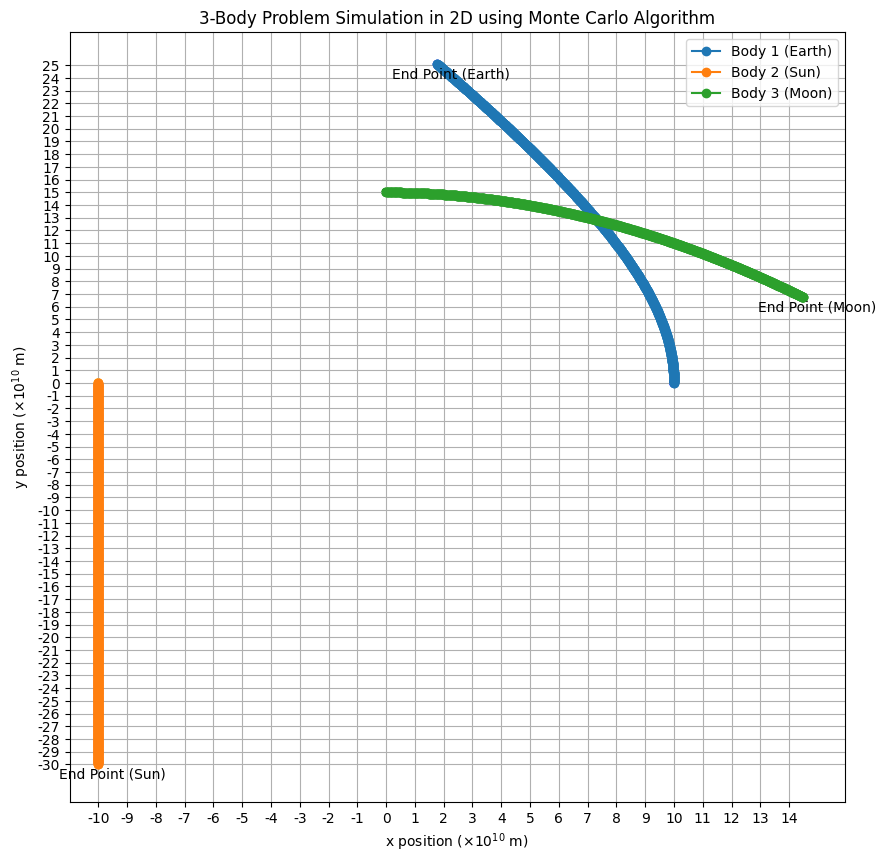

In [6]:
import matplotlib.pyplot as plt

def plot_3body_simulation(run, results, initial_positions, label1='Body 1 (Earth)', label2='Body 2 (Sun)', label3='Body 3 (Moon)'):
    plt.figure(figsize=(10, 10))
    
    # Extract positions for each body
    x1 = [results['positions'][run][i][0][0] for i in range(len(results['positions'][run]))]
    y1 = [results['positions'][run][i][0][1] for i in range(len(results['positions'][run]))]
    
    x2 = [results['positions'][run][i][1][0] for i in range(len(results['positions'][run]))]
    y2 = [results['positions'][run][i][1][1] for i in range(len(results['positions'][run]))]
    
    x3 = [results['positions'][run][i][2][0] for i in range(len(results['positions'][run]))]
    y3 = [results['positions'][run][i][2][1] for i in range(len(results['positions'][run]))]
    
    # Plot the trajectory for each body
    plt.plot(x1, y1, '-o', label=label1)
    plt.plot(x2, y2, '-o', label=label2)
    plt.plot(x3, y3, '-o', label=label3)
    
    # Plot initial positions
    plt.scatter(initial_positions[:, 0], initial_positions[:, 1], color=['blue', 'orange', 'green'])
    
    plt.scatter(x1[-1], y1[-1], color='blue')
    plt.annotate('End Point (Earth)', (x1[-1], y1[-1]), textcoords="offset points", xytext=(10,-10), ha='center')
    
    plt.scatter(x2[-1], y2[-1], color='orange')
    plt.annotate('End Point (Sun)', (x2[-1], y2[-1]), textcoords="offset points", xytext=(10,-10), ha='center')
    
    plt.scatter(x3[-1], y3[-1], color='green')
    plt.annotate('End Point (Moon)', (x3[-1], y3[-1]), textcoords="offset points", xytext=(10,-10), ha='center')
    
    # Set axis limits based on the data
    all_x = x1 + x2 + x3
    all_y = y1 + y2 + y3

    plt.xlim([min(all_x) - 0.1 * abs(min(all_x)), max(all_x) + 0.1 * abs(max(all_x))])
    plt.ylim([min(all_y) - 0.1 * abs(min(all_y)), max(all_y) + 0.1 * abs(max(all_y))])
    
    # Scale the axis labels to a more readable format (e.g., divide by 1e10)
    scale_factor = 1e10
    plt.xticks(np.arange(min(all_x) // scale_factor * scale_factor, 
                         (max(all_x) // scale_factor + 1) * scale_factor, scale_factor),
               labels=[f'{int(x/scale_factor)}' for x in np.arange(min(all_x) // scale_factor * scale_factor, 
                                                                    (max(all_x) // scale_factor + 1) * scale_factor, scale_factor)])
    
    plt.yticks(np.arange(min(all_y) // scale_factor * scale_factor, 
                         (max(all_y) // scale_factor + 1) * scale_factor, scale_factor),
               labels=[f'{int(y/scale_factor)}' for y in np.arange(min(all_y) // scale_factor * scale_factor, 
                                                                    (max(all_y) // scale_factor + 1) * scale_factor, scale_factor)])
    
    plt.legend()
    plt.xlabel(f'x position ($\\times 10^{{{int(np.log10(scale_factor))}}}$ m)')
    plt.ylabel(f'y position ($\\times 10^{{{int(np.log10(scale_factor))}}}$ m)')
    plt.title('3-Body Problem Simulation in 2D using Monte Carlo Algorithm')
    plt.grid(True)
    plt.show()

# Example usage:
plot_3body_simulation(0, results, initial_positions)


The first plot is a discrete one of given positions and given velocities for point mass versions of earth, sun and the moon (A prime example for three body dynamics). The bodies exhibit rather analytically expected tendencies. The sun of the mass, while causing a strong gravitational force and skewing the trajectory, deviates very little from the vector direction of the initial velocity.

One interesting observation, however, can be made with the total kinetic energy: In any given total system, external system and the internal parts which possess kinetic or potential energy, the total energy must be constant. Which analytically means the kinetic and potential energy must behave accordingly, however for any given trajectory, the kinetic energy exhibits similar behaviors given time goes to the limit. 

To further show the natural distribution that is reached by the kinetic energy, a random error will be introduced.

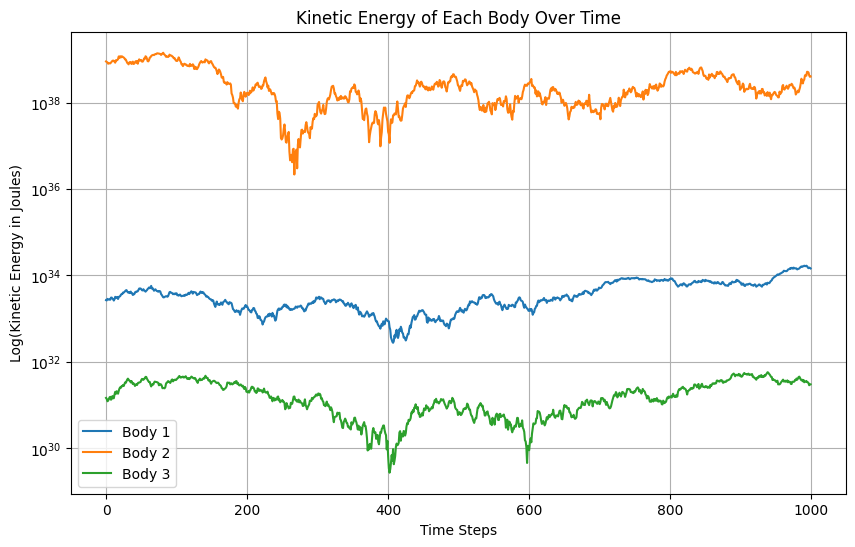

Time-averaged Kinetic Energy for each body: [4.13669215e+33 3.15700020e+38 1.94078505e+31]


In [10]:
import numpy as np
import matplotlib.pyplot as plt

def add_random_perturbation(velocities, noise_level):
    perturbation = np.random.normal(0, noise_level, velocities.shape)
    return velocities + perturbation
# Function to calculate kinetic energy
def kinetic_energy(velocity, mass):
    return 0.5 * mass * np.sum(velocity**2)

# Simulation function with correct initial energy calculation
def simulate_with_perturbation(N, n_steps, dt, masses, initial_positions, initial_velocities, noise_level=0):
    positions = np.zeros((n_steps, N, 2))
    velocities = np.zeros((n_steps, N, 2))
    kinetic_energies = np.zeros((n_steps, N))

    positions[0] = initial_positions
    velocities[0] = initial_velocities

    # Calculate initial kinetic energies at time step 0
    for i in range(N):
        kinetic_energies[0, i] = kinetic_energy(velocities[0, i], masses[i])

    for step in range(1, n_steps):
        velocities[step] = add_random_perturbation(velocities[step-1], noise_level)
        positions[step], velocities[step] = monte_carlo_step(positions[step-1], velocities[step], dt)
        
        for i in range(N):
            kinetic_energies[step, i] = kinetic_energy(velocities[step, i], masses[i])

    return positions, velocities, kinetic_energies

# Example simulation with random perturbation
n_steps = 1000
dt = 1e4
masses = [5.972e24, 1.989e30, 7.348e22]  # Earth, Sun, Moon
initial_positions = np.array([[1.0e11, 0.0], [-1.0e11, 0.0], [0.0, 1.5e11]])
initial_velocities = np.array([[0.0, 3.0e4], [0.0, -3.0e4], [2.0e4, 0.0]])
noise_level = 1e3  # Small perturbation

positions, velocities, kinetic_energies = simulate_with_perturbation(3, n_steps, dt, masses, initial_positions, initial_velocities, noise_level)

# Adjusting the plot for better visibility
plt.figure(figsize=(10, 6))
for i in range(3):
    plt.plot(np.arange(n_steps), kinetic_energies[:, i], label=f'Body {i+1}')
plt.yscale('log')  # Use a logarithmic scale to better differentiate energies
plt.title('Kinetic Energy of Each Body Over Time')
plt.xlabel('Time Steps')
plt.ylabel('Log(Kinetic Energy in Joules)')
plt.legend()
plt.grid(True)
plt.show()

# Time-averaged kinetic energy
time_averaged_kinetic_energy = np.mean(kinetic_energies, axis=0)
print("Time-averaged Kinetic Energy for each body:", time_averaged_kinetic_energy)


As observable, both the introduced random error and the natural chaos of the 3-body problem introduces a kinetic energy vs time step graph that has a large range, and a lot of fluctuations. 

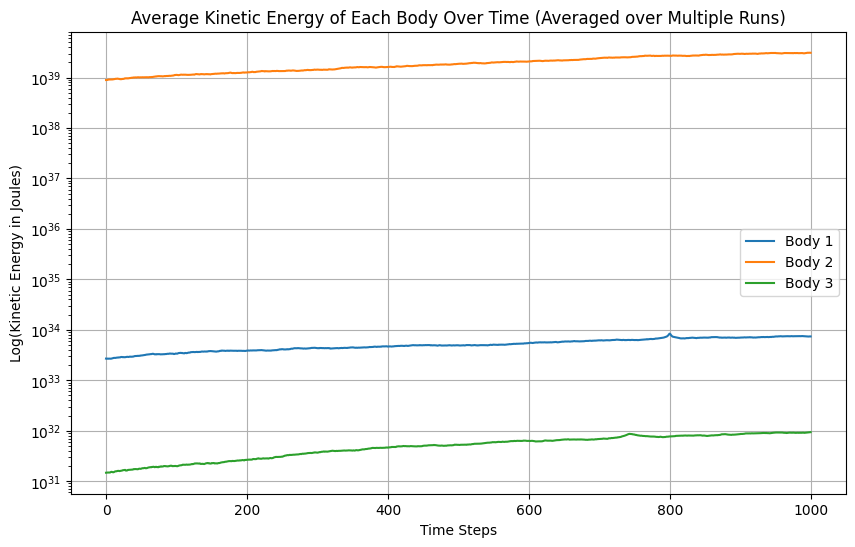

In [53]:
def average_kinetic_energy_over_runs(num_runs, n_steps, dt, masses, initial_positions, initial_velocities, noise_level):
    kinetic_energies_all_runs = np.zeros((num_runs, n_steps, len(masses)))

    for run in range(num_runs):
        _, _, kinetic_energies = simulate_with_perturbation(len(masses), n_steps, dt, masses, initial_positions, initial_velocities, noise_level)
        kinetic_energies_all_runs[run] = kinetic_energies
    
    # Average over all runs
    average_kinetic_energies = np.mean(kinetic_energies_all_runs, axis=0)
    
    return average_kinetic_energies

# Example usage:
num_runs = 100
average_kinetic_energies = average_kinetic_energy_over_runs(num_runs, n_steps, dt, masses, initial_positions, initial_velocities, noise_level)

# Plot the average kinetic energies
plt.figure(figsize=(10, 6))
for i in range(3):
    plt.plot(np.arange(n_steps), average_kinetic_energies[:, i], label=f'Body {i+1}')
plt.yscale('log')  # Use a logarithmic scale to better differentiate energies
plt.title('Average Kinetic Energy of Each Body Over Time (Averaged over Multiple Runs)')
plt.xlabel('Time Steps')
plt.ylabel('Log(Kinetic Energy in Joules)')
plt.legend()
plt.grid(True)
plt.show()


For the same given initial conditions, however, if one is to take the average of multiple (for example 100 runs), instead of focusing on a singular run one gets a quite stable distribution of kinetic energy over time, with a general increase of kinetic energy as more time steps are taken.

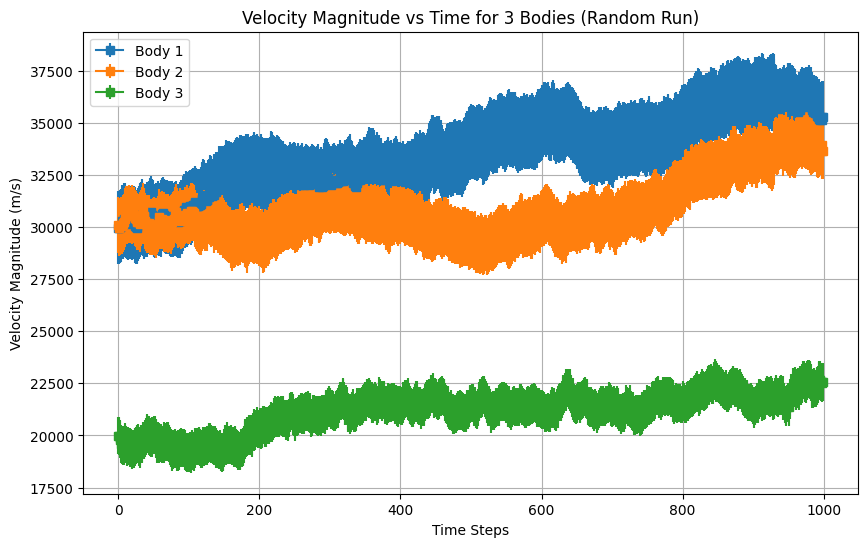

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Simulate a single run with perturbations
def simulate_single_run(N, n_steps, dt, masses, initial_positions, initial_velocities, noise_level=0):
    positions = np.zeros((n_steps, N, 2))
    velocities = np.zeros((n_steps, N, 2))
    
    positions[0] = initial_positions
    velocities[0] = initial_velocities

    for step in range(1, n_steps):
        # Optionally add noise to velocities
        velocities[step-1] += np.random.normal(0, noise_level, velocities[step-1].shape)
        positions[step], velocities[step] = monte_carlo_step(positions[step-1], velocities[step-1], dt)
        
    return positions, velocities

# Function to plot velocity magnitudes vs time for a random run
def plot_velocity_vs_time_random_run(n_steps, dt, masses, initial_positions, initial_velocities, noise_level=0, labels=['Body 1', 'Body 2', 'Body 3']):
    # Simulate a single run
    positions, velocities = simulate_single_run(len(masses), n_steps, dt, masses, initial_positions, initial_velocities, noise_level)
    
    velocities_magnitudes = []
    time_steps = np.arange(0, n_steps)

    for body_index in range(len(masses)):  # Loop over each body
        magnitudes = []
        for step in time_steps:
            velocity = velocities[step][body_index]
            magnitude = np.sqrt(velocity[0]**2 + velocity[1]**2)
            magnitudes.append(magnitude)
        velocities_magnitudes.append(magnitudes)

    velocities_magnitudes = np.array(velocities_magnitudes)

    # Calculate the standard deviation for each body's velocities
    velocity_std = np.std(velocities_magnitudes, axis=1)

    # Plotting
    plt.figure(figsize=(10, 6))
    
    for i in range(3):
        plt.errorbar(time_steps, velocities_magnitudes[i], yerr=velocity_std[i], fmt='-s', label=f'{labels[i]}', markersize=6)

    plt.title('Velocity Magnitude vs Time for 3 Bodies (Random Run)')
    plt.xlabel('Time Steps')
    plt.ylabel('Velocity Magnitude (m/s)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
n_steps = 1000
dt = 1e3
masses = [5.972e24, 1.989e30, 7.348e22]  # Earth, Sun, Moon
initial_positions = np.array([[1.0e11, 0.0], [-1.0e11, 0.0], [0.0, 1.5e11]])
initial_velocities = np.array([[0.0, 3.0e4], [0.0, -3.0e4], [2.0e4, 0.0]])
noise_level = 1e2  # Small perturbation

# Plot the velocity magnitudes for a random run
plot_velocity_vs_time_random_run(n_steps, dt, masses, initial_positions, initial_velocities, noise_level)


The plot of velocity is quite similar to kinetic energy, only being on a smaller scale, still quite a bit of variation (the thickness of lines refer to the standard deviation of the given body, and the middle point of the thick lines refer to the velocity at that time)

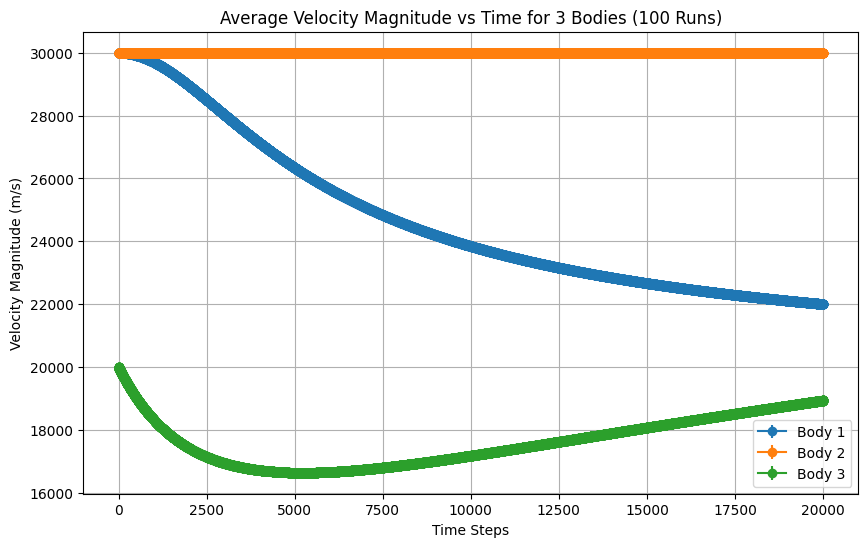

In [30]:
import matplotlib.pyplot as plt
import numpy as np

def average_velocity_magnitude_over_runs(num_runs, n_steps, dt, masses, initial_positions, initial_velocities, noise_level):
    velocities_magnitudes_all_runs = np.zeros((num_runs, n_steps, len(masses)))

    for run in range(num_runs):
        _, velocities, one_ = simulate_with_perturbation(len(masses), n_steps, dt, masses, initial_positions, initial_velocities, noise_level)
        for body_index in range(3):  # Assuming 3 bodies
            for step in range(n_steps):
                velocity = velocities[step][body_index]
                magnitude = np.sqrt(velocity[0]**2 + velocity[1]**2)
                velocities_magnitudes_all_runs[run, step, body_index] = magnitude

    avg_velocities_magnitudes = np.mean(velocities_magnitudes_all_runs, axis=0)
    std_velocities_magnitudes = np.std(velocities_magnitudes_all_runs, axis=0)

    return avg_velocities_magnitudes, std_velocities_magnitudes

def plot_velocity_vs_time(num_runs, n_steps, dt, masses, initial_positions, initial_velocities, noise_level, labels=['Body 1', 'Body 2', 'Body 3']):
    time_steps = np.arange(n_steps)
    
    avg_velocities_magnitudes, std_velocities_magnitudes = average_velocity_magnitude_over_runs(
        num_runs, n_steps, dt, masses, initial_positions, initial_velocities, noise_level
    )

    # Plotting
    plt.figure(figsize=(10, 6))
    
    for i in range(3):
        plt.errorbar(time_steps, avg_velocities_magnitudes[:, i], yerr=std_velocities_magnitudes[:, i], 
                     fmt='-o', label=f'{labels[i]}', markersize=6)

    plt.title('Average Velocity Magnitude vs Time for 3 Bodies (100 Runs)')
    plt.xlabel('Time Steps')
    plt.ylabel('Velocity Magnitude (m/s)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
n_steps = 20000
dt = 1e3  # Reduced time step
masses = [5.972e24, 1.989e30, 7.348e22]  # Earth, Sun, Moon
initial_positions = np.array([[1.0e11, 0.0], [-1.0e11, 0.0], [0.0, 1.5e11]])
initial_velocities = np.array([[0.0, 3.0e4], [0.0, -3.0e4], [2.0e4, 0.0]])
noise_level = 0  # Start with no perturbations to stabilize

# Run the plot function for 100 runs
plot_velocity_vs_time(30, n_steps, dt, masses, initial_positions, initial_velocities, noise_level)


In [81]:
import numpy as np

def calculate_kinetic_energy(velocities, masses):
    kinetic_energy = np.zeros(velocities.shape[0])
    for i, mass in enumerate(masses):
        kinetic_energy += 0.5 * mass * (velocities[:, i, 0]**2 + velocities[:, i, 1]**2)
    return kinetic_energy

def plot_corrected_kinetic_energy(results, masses, time_steps):
    kinetic_energies = np.zeros((len(results['velocities']), len(masses)))

    for i, velocities in enumerate(results['velocities']):
        kinetic_energies[i] = calculate_kinetic_energy(velocities, masses)

    avg_kinetic_energy = np.mean(kinetic_energies, axis=0)
    std_kinetic_energy = np.std(kinetic_energies, axis=0)

    plt.figure(figsize=(10, 6))
    for i in range(len(masses)):
        plt.errorbar(time_steps, avg_kinetic_energy[i], yerr=std_kinetic_energy[i],
                     fmt='-o', label=f'Body {i+1}', markersize=6)
    
    plt.title('Corrected Kinetic Energy vs Time')
    plt.xlabel('Time Steps')
    plt.ylabel('Kinetic Energy (Joules)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
time_steps = np.arange(0, len(results['velocities'][0]), 100)  # Adjust according to your sampling
plot_corrected_kinetic_energy(results, masses, time_steps)


ValueError: could not broadcast input array from shape (1000,) into shape (3,)

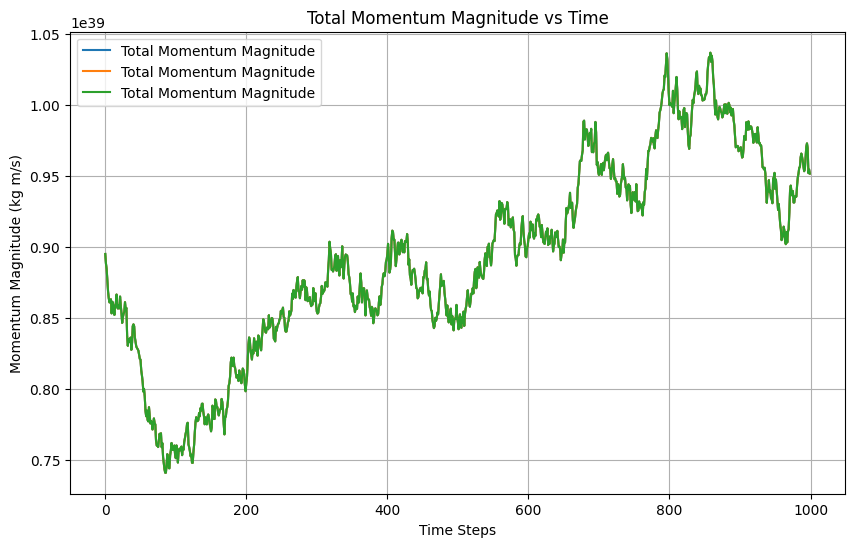

In [32]:
def plot_total_momentum_over_time(n_steps, dt, masses, initial_positions, initial_velocities, noise_level=0):
    # Simulate the system using the existing simulate_with_perturbation function
    positions, velocities, momenta = simulate_with_perturbation(len(masses), n_steps, dt, masses, initial_positions, initial_velocities, noise_level)
    
    for i in range(len(momenta)):
        momenta[i] = momenta[i][0] + momenta[i][1] + momenta[i][2]

    # Plotting
    time_steps = np.arange(n_steps)
    
    plt.figure(figsize=(10, 6))
    plt.plot(time_steps, momenta, label='Total Momentum Magnitude')
    
    plt.title('Total Momentum Magnitude vs Time')
    plt.xlabel('Time Steps')
    plt.ylabel('Momentum Magnitude (kg m/s)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
n_steps = 1000
dt = 1e3
masses = [5.972e24, 1.989e30, 7.348e22]  # Earth, Sun, Moon
initial_positions = np.array([[1.0e11, 0.0], [-1.0e11, 0.0], [0.0, 1.5e11]])
initial_velocities = np.array([[0.0, 3.0e4], [0.0, -3.0e4], [2.0e4, 0.0]])
noise_level = 1e2  # Small perturbation

# Plot the total momentum magnitude over time
plot_total_momentum_over_time(n_steps, dt, masses, initial_positions, initial_velocities, noise_level)


[[2.7015862606528385e+38, 8.808764578621244e+43, 1.37453017188004e+36], [2.7015862606528385e+38, 8.808764578621244e+43, 1.37453017188004e+36], [2.7015862606528385e+38, 8.808764578621244e+43, 1.37453017188004e+36], [2.7015862606528385e+38, 8.808764578621244e+43, 1.37453017188004e+36], [2.7015862606528385e+38, 8.808764578621244e+43, 1.37453017188004e+36], [2.7015862606528385e+38, 8.808764578621244e+43, 1.37453017188004e+36], [2.7015862606528385e+38, 8.808764578621244e+43, 1.37453017188004e+36], [2.7015862606528385e+38, 8.808764578621244e+43, 1.37453017188004e+36], [2.7015862606528385e+38, 8.808764578621244e+43, 1.37453017188004e+36], [2.7015862606528385e+38, 8.808764578621244e+43, 1.37453017188004e+36], [2.7015862606528385e+38, 8.808764578621244e+43, 1.37453017188004e+36], [2.7015862606528385e+38, 8.808764578621244e+43, 1.37453017188004e+36], [2.7015862606528385e+38, 8.808764578621244e+43, 1.37453017188004e+36], [2.7015862606528385e+38, 8.808764578621244e+43, 1.37453017188004e+36], [2.70

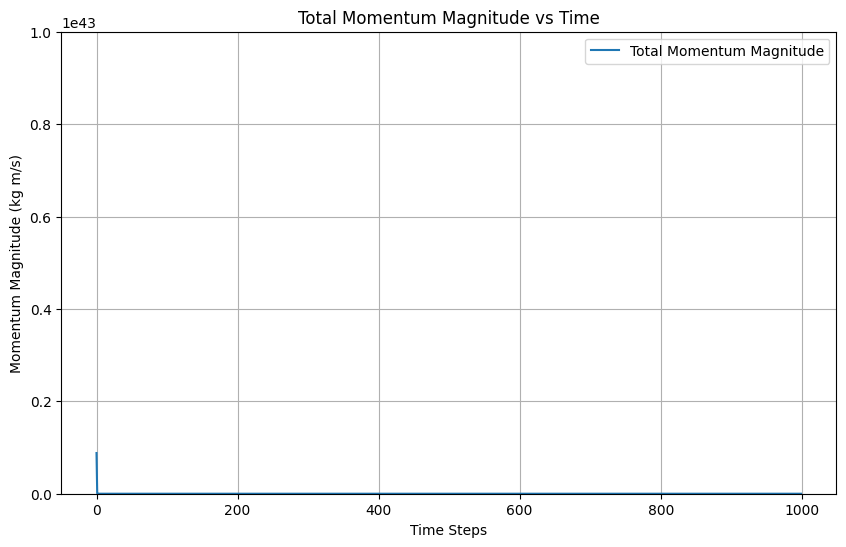

In [42]:
def momenta_runs_average(n_runs, n_steps, dt, masses, initial_positions, initial_velocities, noise_level):
    positions, velocities, momenta = simulate_with_perturbation(len(masses), n_steps, dt, masses, initial_positions, initial_velocities, noise_level)
    momenta_total = [[0,0,0]]*n_steps
    for j in range(n_runs-1):
        positions, velocities, momenta = simulate_with_perturbation(len(masses), n_steps, dt, masses, initial_positions, initial_velocities, noise_level)
        for i in range(len(momenta)):
            momenta_total[i][0] += momenta[i][0] 
            momenta_total[i][1] += momenta[i][1]
            momenta_total[i][2] += momenta[i][2]
    print(momenta_total)
    for i in range(len(momenta_total)):
        momenta_total[i][0] /= n_runs
        momenta_total[i][1] /= n_runs
        momenta_total[i][2] /= n_runs
        momenta_total[i] = momenta_total[i][0] + momenta_total[i][1] + momenta_total[i][2]
    # Plotting
    print(momenta_total)
    time_steps = np.arange(n_steps)

    plt.figure(figsize=(10, 6))
    plt.plot(time_steps, momenta_total, label='Total Momentum Magnitude')
    
    plt.title('Total Momentum Magnitude vs Time')
    plt.xlabel('Time Steps')
    plt.ylabel('Momentum Magnitude (kg m/s)')
    plt.ylim(1e30, 1e43)  # Set the y-axis limits
    plt.legend()
    plt.grid(True)
    plt.show()

n_runs = 100
n_steps = 1000
dt = 1e3
masses = [5.972e24, 1.989e30, 7.348e22]  # Earth, Sun, Moon
initial_positions = np.array([[1.0e11, 0.0], [-1.0e11, 0.0], [0.0, 1.5e11]])
initial_velocities = np.array([[0.0, 3.0e4], [0.0, -3.0e4], [2.0e4, 0.0]])
noise_level = 1e2  # Small perturbation

momenta_runs_average(n_runs, n_steps, dt, masses, initial_positions, initial_velocities, noise_level)


# Code trash

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
G = 6.67430e-11  # Gravitational constant, m^3 kg^-1 s^-2
masses = [5.972e24, 1.989e30, 7.348e22]  # Earth, Sun, Moon

# Initial conditions
initial_positions = np.array([[1.0e11, 0.0], [-1.0e11, 0.0], [0.0, 1.5e11]])
initial_velocities = np.array([[0.0, 3.0e4], [0.0, -3.0e4], [2.0e4, 0.0]])

# Monte Carlo step
def monte_carlo_step(positions, velocities, dt):
    new_positions = np.zeros_like(positions)
    new_velocities = np.zeros_like(velocities)
    
    for i in range(3):
        force = np.zeros(2)
        for j in range(3):
            if i != j:
                r = positions[j] - positions[i]
                distance = np.sqrt(np.dot(r, r))
                force += G * masses[j] * r / distance**3
                
        new_velocities[i] = velocities[i] + force * dt
        new_positions[i] = positions[i] + new_velocities[i] * dt
        
    return new_positions, new_velocities

# Simulation parameters
n_steps = 10000
dt = 1e4
positions = np.zeros((n_steps, 3, 2))
velocities = np.zeros((n_steps, 3, 2))
positions[0] = initial_positions
velocities[0] = initial_velocities

# Monte Carlo simulation loop
for step in range(1, n_steps):
    positions[step], velocities[step] = monte_carlo_step(positions[step-1], velocities[step-1], dt)




In [ ]:
def plot_3body_simulation(results, initial_positions, label1="Body 1 (Earth)", label2="Body 2 (Sun)", label3="Body 3 (Moon)"):
    plt.figure(figsize=(10, 10))
    plt.plot(results[:, 0, 0], results[:, 0, 1], label=label1)
    plt.plot(results[:, 1, 0], results[:, 1, 1], label=label2)
    plt.plot(results[:, 2, 0], results[:, 2, 1], label=label3)
    plt.scatter(initial_positions[:, 0], initial_positions[:, 1], color=['blue', 'orange', 'green'])
    plt.legend()
    plt.xlabel('x position (m)')
    plt.ylabel('y position (m)')
    plt.title('3-Body Problem Simulation in 2D using Monte Carlo Algorithm')
    plt.grid(True)
    plt.show()

# Example usage:
plot_3body_simulation(results, initial_positions)
